<a href="https://www.kaggle.com/code/mh0386/handwriting-recognition?scriptVersionId=138202612" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


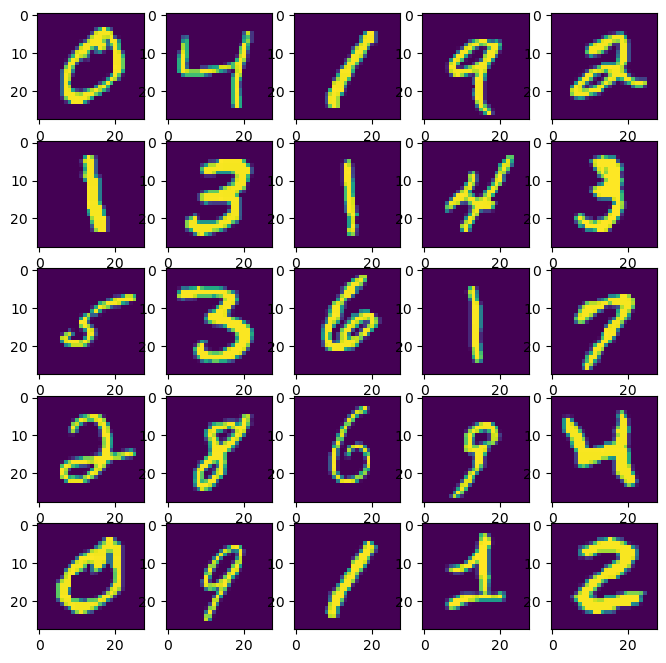

In [3]:
figure = plt.figure(figsize=(8, 8))
for i in range(1, 26):
    figure.add_subplot(5, 5, i)
    plt.imshow(x_train[i])

In [4]:
# Normalize the input images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
# Reshape the input images to match the expected format
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [6]:
model = tf.keras.Sequential(
    [
        Conv2D(64, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(28, 28, 1)),
        MaxPool2D(pool_size=(2, 2)),
        Conv2D(32, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(28, 28, 1)),
        MaxPool2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(28, 28, 1)),
        MaxPool2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512, activation=tf.nn.relu),
        Dense(256, activation=tf.nn.relu),
        Dense(128, activation=tf.nn.relu),
        Dense(10, activation=tf.nn.softmax)
    ]
)

In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 44s 112ms/step - loss: 0.4375 - accuracy: 0.8578 - val_loss: 0.1557 - val_accuracy: 0.9551
Epoch 2/10
375/375 [==============================] - 39s 104ms/step - loss: 0.1423 - accuracy: 0.9560 - val_loss: 0.1194 - val_accuracy: 0.9644
Epoch 3/10
375/375 [==============================] - 39s 104ms/step - loss: 0.1034 - accuracy: 0.9676 - val_loss: 0.0812 - val_accuracy: 0.9760
Epoch 4/10
375/375 [==============================] - 37s 100ms/step - loss: 0.0815 - accuracy: 0.9745 - val_loss: 0.0816 - val_accuracy: 0.9747
Epoch 5/10
375/375 [==============================] - 38s 102ms/step - loss: 0.0686 - accuracy: 0.9789 - val_loss: 0.0847 - val_accuracy: 0.9738
Epoch 6/10
375/375 [==============================] - 38s 101ms/step - loss: 0.0607 - accuracy: 0.9807 - val_loss: 0.0769 - val_accuracy: 0.9759
Epoch 7/10
375/375 [==============================] - 38s 100ms/step - loss: 0.0553 - accuracy: 0.9823 - val_loss: 0.0601 - val_ac

In [9]:
model.evaluate(
    x_test,
    y_test
)

313/313 [==============================] - 3s 9ms/step - loss: 0.0664 - accuracy: 0.9806


[0.0663711279630661, 0.9805999994277954]

313/313 [==============================] - 3s 8ms/step
The predicted number is  5


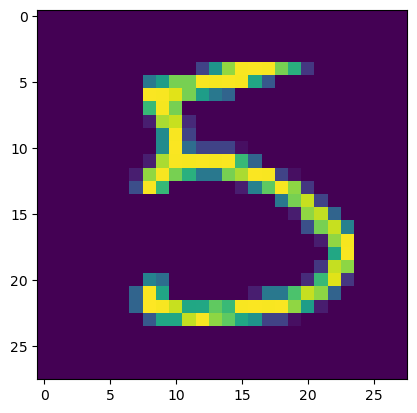

In [10]:
prediction = model.predict(x_test)
prediction = np.argmax(prediction, axis=1)
plt.imshow(x_test[15].reshape(28, 28))
print('The predicted number is  ' + str(prediction[15]))

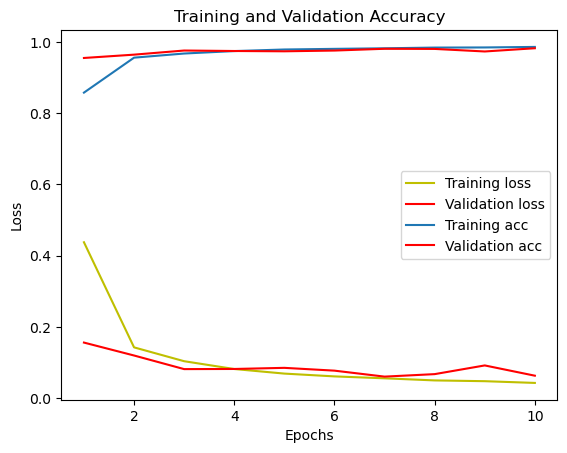

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()